In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [3]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 27)           837         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 27)           108         dense_1[0][0]                    
_____________________________________________________________________________________

426472/426472 [==============================] - 24s 56us/step - loss: 11.4567 - rec_loss: 17.9471 - kl_loss: 4.1241 - val_loss: 13.7571 - val_rec_loss: 24.4113 - val_kl_loss: 2.7915
Epoch 17/150
426472/426472 [==============================] - 24s 56us/step - loss: 11.4346 - rec_loss: 17.9170 - kl_loss: 4.1227 - val_loss: 13.3915 - val_rec_loss: 23.7611 - val_kl_loss: 2.7077
Epoch 18/150
426472/426472 [==============================] - 24s 56us/step - loss: 11.3257 - rec_loss: 17.6910 - kl_loss: 4.1354 - val_loss: 13.7208 - val_rec_loss: 24.4872 - val_kl_loss: 2.6336
Epoch 19/150
426472/426472 [==============================] - 24s 56us/step - loss: 11.3374 - rec_loss: 17.7257 - kl_loss: 4.1339 - val_loss: 13.4836 - val_rec_loss: 23.7778 - val_kl_loss: 2.8783
Epoch 20/150
426472/426472 [==============================] - 24s 56us/step - loss: 11.3074 - rec_loss: 17.6630 - kl_loss: 4.1473 - val_loss: 13.5266 - val_rec_loss: 23.6972 - val_kl_loss: 3.0331
Epoch 21/150
426472/426472 [=====

Epoch 58/150
426472/426472 [==============================] - 25s 58us/step - loss: 10.8140 - rec_loss: 16.6986 - kl_loss: 4.2283 - val_loss: 12.7356 - val_rec_loss: 22.1780 - val_kl_loss: 2.9864
Epoch 59/150
426472/426472 [==============================] - 25s 59us/step - loss: 10.8602 - rec_loss: 16.7963 - kl_loss: 4.2210 - val_loss: 12.8788 - val_rec_loss: 22.4707 - val_kl_loss: 2.9852
Epoch 60/150
426472/426472 [==============================] - 25s 59us/step - loss: 10.8515 - rec_loss: 16.7732 - kl_loss: 4.2287 - val_loss: 12.8968 - val_rec_loss: 22.5913 - val_kl_loss: 2.8974
Epoch 61/150
426472/426472 [==============================] - 25s 58us/step - loss: 10.8330 - rec_loss: 16.7587 - kl_loss: 4.2074 - val_loss: 12.7377 - val_rec_loss: 22.3190 - val_kl_loss: 2.8467
Epoch 62/150
426472/426472 [==============================] - 24s 57us/step - loss: 10.8013 - rec_loss: 16.6861 - kl_loss: 4.2168 - val_loss: 12.7836 - val_rec_loss: 22.2250 - val_kl_loss: 3.0255
Epoch 63/150
426472/

Epoch 100/150
426472/426472 [==============================] - 24s 57us/step - loss: 10.6887 - rec_loss: 16.3618 - kl_loss: 4.3399 - val_loss: 12.6507 - val_rec_loss: 22.0201 - val_kl_loss: 2.9732
Epoch 101/150
426472/426472 [==============================] - 24s 57us/step - loss: 10.6741 - rec_loss: 16.3482 - kl_loss: 4.3287 - val_loss: 12.5737 - val_rec_loss: 21.7216 - val_kl_loss: 3.1148
Epoch 102/150
426472/426472 [==============================] - 24s 57us/step - loss: 10.6603 - rec_loss: 16.3244 - kl_loss: 4.3302 - val_loss: 12.5214 - val_rec_loss: 21.5943 - val_kl_loss: 3.1331
Epoch 103/150
426472/426472 [==============================] - 25s 58us/step - loss: 10.5801 - rec_loss: 16.1640 - kl_loss: 4.3274 - val_loss: 12.7538 - val_rec_loss: 22.2492 - val_kl_loss: 2.9461
Epoch 104/150
426472/426472 [==============================] - 24s 57us/step - loss: 10.6089 - rec_loss: 16.2004 - kl_loss: 4.3457 - val_loss: 12.6662 - val_rec_loss: 22.0410 - val_kl_loss: 2.9859
Epoch 105/150
4

426472/426472 [==============================] - 24s 57us/step - loss: 10.5513 - rec_loss: 16.1066 - kl_loss: 4.3446 - val_loss: 12.3437 - val_rec_loss: 21.2621 - val_kl_loss: 3.1286
Epoch 142/150
426472/426472 [==============================] - 24s 56us/step - loss: 10.5620 - rec_loss: 16.1214 - kl_loss: 4.3551 - val_loss: 12.5635 - val_rec_loss: 21.5463 - val_kl_loss: 3.2805
Epoch 143/150
426472/426472 [==============================] - 24s 57us/step - loss: 10.5404 - rec_loss: 16.0719 - kl_loss: 4.3590 - val_loss: 12.5213 - val_rec_loss: 21.5870 - val_kl_loss: 3.1580
Epoch 144/150
426472/426472 [==============================] - 24s 57us/step - loss: 10.6053 - rec_loss: 16.2111 - kl_loss: 4.3487 - val_loss: 12.6022 - val_rec_loss: 21.7862 - val_kl_loss: 3.1241
Epoch 145/150
426472/426472 [==============================] - 24s 56us/step - loss: 10.5792 - rec_loss: 16.1634 - kl_loss: 4.3469 - val_loss: 12.4184 - val_rec_loss: 21.3746 - val_kl_loss: 3.1583
Epoch 146/150
426472/426472 [

Epoch 42/50
426472/426472 [==============================] - 77s 179us/step - loss: 0.0373 - accuracy: 0.9885 - val_loss: 0.0414 - val_accuracy: 0.9876
Epoch 43/50
426472/426472 [==============================] - 77s 181us/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0409 - val_accuracy: 0.9870
Epoch 44/50
426472/426472 [==============================] - 77s 182us/step - loss: 0.0372 - accuracy: 0.9887 - val_loss: 0.0410 - val_accuracy: 0.9882
Epoch 45/50
426472/426472 [==============================] - 77s 181us/step - loss: 0.0373 - accuracy: 0.9886 - val_loss: 0.0448 - val_accuracy: 0.9863
Epoch 46/50
426472/426472 [==============================] - 77s 181us/step - loss: 0.0372 - accuracy: 0.9885 - val_loss: 0.0415 - val_accuracy: 0.9878
Epoch 47/50
426472/426472 [==============================] - 77s 181us/step - loss: 0.0371 - accuracy: 0.9885 - val_loss: 0.0440 - val_accuracy: 0.9873
Epoch 48/50
426472/426472 [==============================] - 75s 177us/step - loss: 0.03

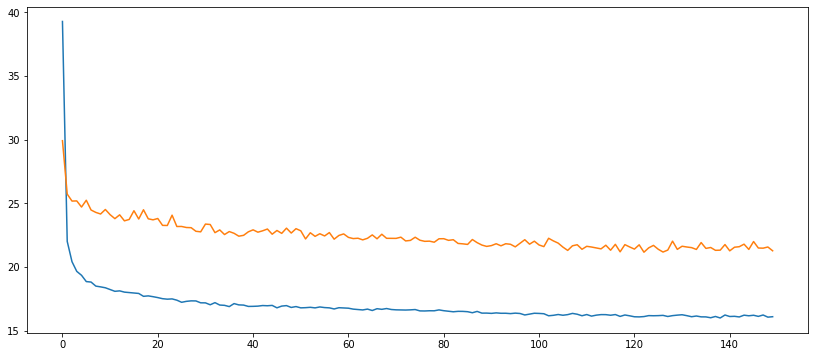

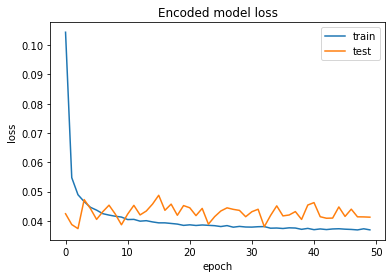

Overall accuracy of Convolutional Neural Network model: 0.9872194601275245


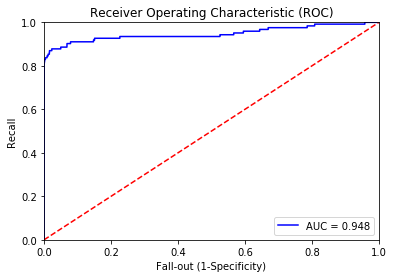

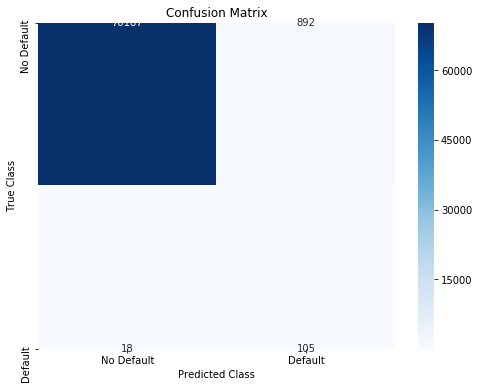

AUC(ROC): 0.9205545598696606
Precision: 0.10531594784353059
Recall: 0.8536585365853658
F1 score: 0.1875
False positives: 892
True positives: 105
False negatives: 18
True negatives: 70187
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 27)           837         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 27)           108         dense_10[0][0]                   
_____________________________________________________________________________________

426472/426472 [==============================] - 22s 51us/step - loss: 11.2685 - rec_loss: 17.2725 - kl_loss: 4.3266 - val_loss: 13.6484 - val_rec_loss: 23.9839 - val_kl_loss: 2.8801
Epoch 17/150
426472/426472 [==============================] - 22s 51us/step - loss: 11.2155 - rec_loss: 17.1923 - kl_loss: 4.3199 - val_loss: 13.2444 - val_rec_loss: 23.3214 - val_kl_loss: 2.7607
Epoch 18/150
426472/426472 [==============================] - 21s 49us/step - loss: 11.1740 - rec_loss: 17.1244 - kl_loss: 4.3198 - val_loss: 13.1290 - val_rec_loss: 22.9942 - val_kl_loss: 2.8639
Epoch 19/150
426472/426472 [==============================] - 21s 49us/step - loss: 11.1476 - rec_loss: 17.1076 - kl_loss: 4.3103 - val_loss: 13.2924 - val_rec_loss: 23.3294 - val_kl_loss: 2.8632
Epoch 20/150
426472/426472 [==============================] - 21s 49us/step - loss: 11.1018 - rec_loss: 17.0319 - kl_loss: 4.3130 - val_loss: 13.0924 - val_rec_loss: 22.9089 - val_kl_loss: 2.8898
Epoch 21/150
426472/426472 [=====

Epoch 58/150
426472/426472 [==============================] - 22s 51us/step - loss: 10.7000 - rec_loss: 16.3527 - kl_loss: 4.3248 - val_loss: 12.8881 - val_rec_loss: 22.4615 - val_kl_loss: 2.9721
Epoch 59/150
426472/426472 [==============================] - 22s 51us/step - loss: 10.7244 - rec_loss: 16.4102 - kl_loss: 4.3213 - val_loss: 12.9321 - val_rec_loss: 22.6190 - val_kl_loss: 2.8862
Epoch 60/150
426472/426472 [==============================] - 22s 51us/step - loss: 10.7541 - rec_loss: 16.4444 - kl_loss: 4.3367 - val_loss: 12.8467 - val_rec_loss: 22.2691 - val_kl_loss: 3.0723
Epoch 61/150
426472/426472 [==============================] - 22s 51us/step - loss: 10.7395 - rec_loss: 16.4207 - kl_loss: 4.3364 - val_loss: 12.8479 - val_rec_loss: 22.3821 - val_kl_loss: 2.9731
Epoch 62/150
426472/426472 [==============================] - 22s 51us/step - loss: 10.7378 - rec_loss: 16.4251 - kl_loss: 4.3323 - val_loss: 12.8357 - val_rec_loss: 22.3720 - val_kl_loss: 2.9504
Epoch 63/150
426472/

Epoch 100/150
426472/426472 [==============================] - 22s 51us/step - loss: 10.6287 - rec_loss: 16.2030 - kl_loss: 4.3670 - val_loss: 12.9446 - val_rec_loss: 22.5532 - val_kl_loss: 2.9618
Epoch 101/150
426472/426472 [==============================] - 22s 51us/step - loss: 10.6365 - rec_loss: 16.2075 - kl_loss: 4.3710 - val_loss: 12.7230 - val_rec_loss: 22.1871 - val_kl_loss: 2.8912
Epoch 102/150
426472/426472 [==============================] - 22s 51us/step - loss: 10.5807 - rec_loss: 16.1046 - kl_loss: 4.3554 - val_loss: 12.8138 - val_rec_loss: 22.2553 - val_kl_loss: 2.9971
Epoch 103/150
426472/426472 [==============================] - 22s 51us/step - loss: 10.5903 - rec_loss: 16.1182 - kl_loss: 4.3619 - val_loss: 13.0323 - val_rec_loss: 22.7385 - val_kl_loss: 2.9702
Epoch 104/150
426472/426472 [==============================] - 22s 51us/step - loss: 10.5581 - rec_loss: 16.0634 - kl_loss: 4.3503 - val_loss: 13.1465 - val_rec_loss: 23.0637 - val_kl_loss: 2.8720
Epoch 105/150
4

426472/426472 [==============================] - 21s 49us/step - loss: 10.5503 - rec_loss: 16.0089 - kl_loss: 4.3788 - val_loss: 12.9050 - val_rec_loss: 22.5157 - val_kl_loss: 2.9563
Epoch 142/150
426472/426472 [==============================] - 21s 49us/step - loss: 10.6065 - rec_loss: 16.1181 - kl_loss: 4.3789 - val_loss: 12.9964 - val_rec_loss: 22.6627 - val_kl_loss: 2.9829
Epoch 143/150
426472/426472 [==============================] - 21s 49us/step - loss: 10.5441 - rec_loss: 16.0122 - kl_loss: 4.3641 - val_loss: 12.8785 - val_rec_loss: 22.5797 - val_kl_loss: 2.8366
Epoch 144/150
426472/426472 [==============================] - 21s 50us/step - loss: 10.5565 - rec_loss: 16.0219 - kl_loss: 4.3716 - val_loss: 13.0131 - val_rec_loss: 22.8571 - val_kl_loss: 2.8262
Epoch 145/150
426472/426472 [==============================] - 22s 51us/step - loss: 10.5684 - rec_loss: 16.0561 - kl_loss: 4.3692 - val_loss: 12.8993 - val_rec_loss: 22.4511 - val_kl_loss: 3.0092
Epoch 146/150
426472/426472 [

Epoch 42/50
426472/426472 [==============================] - 88s 206us/step - loss: 0.0564 - accuracy: 0.9789 - val_loss: 0.0656 - val_accuracy: 0.9722
Epoch 43/50
426472/426472 [==============================] - 88s 206us/step - loss: 0.0564 - accuracy: 0.9787 - val_loss: 0.0658 - val_accuracy: 0.9721
Epoch 44/50
426472/426472 [==============================] - 87s 205us/step - loss: 0.0565 - accuracy: 0.9787 - val_loss: 0.0618 - val_accuracy: 0.9758
Epoch 45/50
426472/426472 [==============================] - 86s 201us/step - loss: 0.0566 - accuracy: 0.9788 - val_loss: 0.0590 - val_accuracy: 0.9749
Epoch 46/50
426472/426472 [==============================] - 86s 203us/step - loss: 0.0566 - accuracy: 0.9789 - val_loss: 0.0606 - val_accuracy: 0.9731
Epoch 47/50
426472/426472 [==============================] - 87s 203us/step - loss: 0.0564 - accuracy: 0.9788 - val_loss: 0.0622 - val_accuracy: 0.9737
Epoch 48/50
426472/426472 [==============================] - 86s 202us/step - loss: 0.05

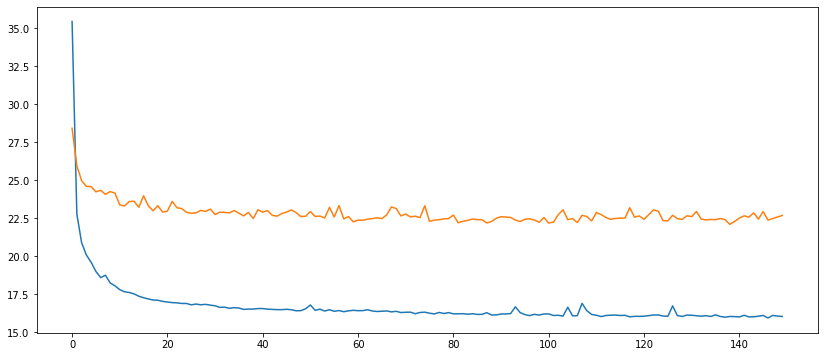

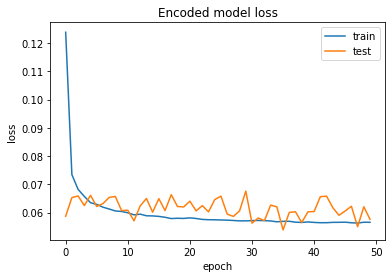

Overall accuracy of Convolutional Neural Network model: 0.9751973259178113


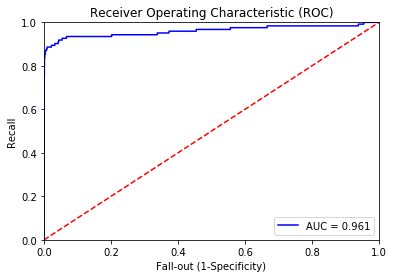

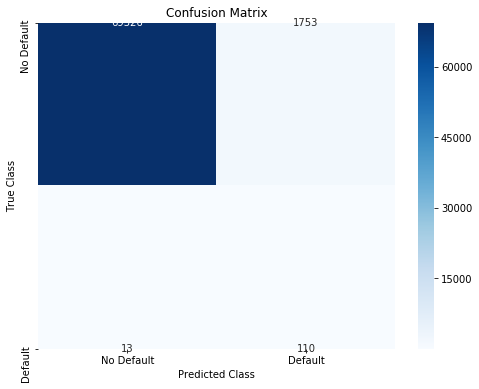

AUC(ROC): 0.9348231219196504
Precision: 0.059044551798174985
Recall: 0.8943089430894309
F1 score: 0.1107754279959718
False positives: 1753
True positives: 110
False negatives: 13
True negatives: 69326
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 27)           837         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 27)           108         dense_19[0][0]                   
_____________________________________________________________________________________

426472/426472 [==============================] - 25s 58us/step - loss: 11.8671 - rec_loss: 18.1721 - kl_loss: 4.4573 - val_loss: 13.6260 - val_rec_loss: 23.9217 - val_kl_loss: 2.8286
Epoch 17/150
426472/426472 [==============================] - 24s 57us/step - loss: 11.7889 - rec_loss: 18.0539 - kl_loss: 4.4466 - val_loss: 13.4857 - val_rec_loss: 23.4624 - val_kl_loss: 3.0226
Epoch 18/150
426472/426472 [==============================] - 25s 58us/step - loss: 11.8194 - rec_loss: 18.1330 - kl_loss: 4.4456 - val_loss: 13.3734 - val_rec_loss: 23.4557 - val_kl_loss: 2.8269
Epoch 19/150
426472/426472 [==============================] - 25s 58us/step - loss: 11.7444 - rec_loss: 17.9876 - kl_loss: 4.4543 - val_loss: 13.5092 - val_rec_loss: 23.6370 - val_kl_loss: 2.9149
Epoch 20/150
426472/426472 [==============================] - 25s 58us/step - loss: 11.7562 - rec_loss: 18.0253 - kl_loss: 4.4513 - val_loss: 13.5832 - val_rec_loss: 23.7386 - val_kl_loss: 2.9629
Epoch 21/150
426472/426472 [=====

Epoch 58/150
426472/426472 [==============================] - 24s 57us/step - loss: 11.2916 - rec_loss: 17.2419 - kl_loss: 4.4719 - val_loss: 13.1162 - val_rec_loss: 23.0114 - val_kl_loss: 2.8430
Epoch 59/150
426472/426472 [==============================] - 24s 57us/step - loss: 11.2922 - rec_loss: 17.2438 - kl_loss: 4.4784 - val_loss: 13.3878 - val_rec_loss: 23.5273 - val_kl_loss: 2.8528
Epoch 60/150
426472/426472 [==============================] - 24s 57us/step - loss: 11.2684 - rec_loss: 17.2064 - kl_loss: 4.4781 - val_loss: 13.0848 - val_rec_loss: 22.9447 - val_kl_loss: 2.8293
Epoch 61/150
426472/426472 [==============================] - 25s 58us/step - loss: 11.2804 - rec_loss: 17.2275 - kl_loss: 4.4767 - val_loss: 13.2169 - val_rec_loss: 23.1998 - val_kl_loss: 2.8435
Epoch 62/150
426472/426472 [==============================] - 24s 57us/step - loss: 11.3007 - rec_loss: 17.2663 - kl_loss: 4.4774 - val_loss: 13.0909 - val_rec_loss: 22.8371 - val_kl_loss: 2.9523
Epoch 63/150
426472/

Epoch 100/150
426472/426472 [==============================] - 25s 58us/step - loss: 11.1400 - rec_loss: 17.0006 - kl_loss: 4.4808 - val_loss: 13.2636 - val_rec_loss: 23.2302 - val_kl_loss: 2.9207
Epoch 101/150
426472/426472 [==============================] - 25s 58us/step - loss: 11.1589 - rec_loss: 17.0411 - kl_loss: 4.4809 - val_loss: 13.3840 - val_rec_loss: 23.3385 - val_kl_loss: 3.0510
Epoch 102/150
426472/426472 [==============================] - 25s 57us/step - loss: 11.1858 - rec_loss: 17.0917 - kl_loss: 4.4831 - val_loss: 13.1583 - val_rec_loss: 23.0515 - val_kl_loss: 2.8844
Epoch 103/150
426472/426472 [==============================] - 24s 57us/step - loss: 11.1806 - rec_loss: 17.0754 - kl_loss: 4.4896 - val_loss: 13.4731 - val_rec_loss: 23.6369 - val_kl_loss: 2.9225
Epoch 104/150
426472/426472 [==============================] - 24s 57us/step - loss: 11.1599 - rec_loss: 17.0499 - kl_loss: 4.4745 - val_loss: 13.1639 - val_rec_loss: 22.9594 - val_kl_loss: 2.9770
Epoch 105/150
4

426472/426472 [==============================] - 83s 195us/step - loss: 0.0631 - accuracy: 0.9786 - val_loss: 0.0623 - val_accuracy: 0.9716
Epoch 3/50
426472/426472 [==============================] - 83s 195us/step - loss: 0.0587 - accuracy: 0.9798 - val_loss: 0.0508 - val_accuracy: 0.9757
Epoch 4/50
426472/426472 [==============================] - 83s 196us/step - loss: 0.0560 - accuracy: 0.9809 - val_loss: 0.0554 - val_accuracy: 0.9764
Epoch 5/50
426472/426472 [==============================] - 86s 201us/step - loss: 0.0550 - accuracy: 0.9814 - val_loss: 0.0561 - val_accuracy: 0.9772
Epoch 6/50
426472/426472 [==============================] - 84s 196us/step - loss: 0.0536 - accuracy: 0.9819 - val_loss: 0.0496 - val_accuracy: 0.9798
Epoch 7/50
426472/426472 [==============================] - 83s 195us/step - loss: 0.0528 - accuracy: 0.9823 - val_loss: 0.0515 - val_accuracy: 0.9789
Epoch 8/50
426472/426472 [==============================] - 84s 196us/step - loss: 0.0520 - accuracy: 0.9

F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426474, 30)
After OverSampling, the shape of train_y: (426474,) 

After OverSampling, counts of label '1': 213237
After OverSampling, counts of label '0': 213237
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 27)           837         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_34 (BatchNo (None, 27)           108         dense_28[0][0]                   
_____________________________________________________________________________________

426474/426474 [==============================] - 24s 55us/step - loss: 10.6967 - rec_loss: 16.5290 - kl_loss: 4.0616 - val_loss: 12.5721 - val_rec_loss: 21.8494 - val_kl_loss: 2.9609
Epoch 92/150
426474/426474 [==============================] - 24s 55us/step - loss: 10.7284 - rec_loss: 16.6049 - kl_loss: 4.0516 - val_loss: 12.4870 - val_rec_loss: 21.6437 - val_kl_loss: 3.0006
Epoch 93/150
426474/426474 [==============================] - 23s 55us/step - loss: 10.7127 - rec_loss: 16.5584 - kl_loss: 4.0581 - val_loss: 12.6959 - val_rec_loss: 22.0446 - val_kl_loss: 3.0121
Epoch 94/150
426474/426474 [==============================] - 23s 55us/step - loss: 10.7363 - rec_loss: 16.5985 - kl_loss: 4.0659 - val_loss: 12.6003 - val_rec_loss: 21.8625 - val_kl_loss: 3.0007
Epoch 95/150
426474/426474 [==============================] - 24s 55us/step - loss: 10.6813 - rec_loss: 16.4879 - kl_loss: 4.0607 - val_loss: 12.6950 - val_rec_loss: 22.1269 - val_kl_loss: 2.9179
Epoch 96/150
426474/426474 [=====

Epoch 133/150
426474/426474 [==============================] - 23s 55us/step - loss: 10.6293 - rec_loss: 16.3834 - kl_loss: 4.0887 - val_loss: 12.6383 - val_rec_loss: 22.0000 - val_kl_loss: 2.9475
Epoch 134/150
426474/426474 [==============================] - 24s 55us/step - loss: 10.6874 - rec_loss: 16.4876 - kl_loss: 4.1019 - val_loss: 12.6379 - val_rec_loss: 21.9441 - val_kl_loss: 3.0130
Epoch 135/150
426474/426474 [==============================] - 24s 55us/step - loss: 10.6598 - rec_loss: 16.4448 - kl_loss: 4.0869 - val_loss: 12.7627 - val_rec_loss: 22.3557 - val_kl_loss: 2.8563
Epoch 136/150
426474/426474 [==============================] - 24s 55us/step - loss: 10.6924 - rec_loss: 16.4871 - kl_loss: 4.1046 - val_loss: 12.5213 - val_rec_loss: 21.6417 - val_kl_loss: 3.0751
Epoch 137/150
426474/426474 [==============================] - 23s 55us/step - loss: 10.6240 - rec_loss: 16.3799 - kl_loss: 4.0791 - val_loss: 12.6338 - val_rec_loss: 22.0409 - val_kl_loss: 2.9104
Epoch 138/150
4

426474/426474 [==============================] - 84s 196us/step - loss: 0.0657 - accuracy: 0.9767 - val_loss: 0.0657 - val_accuracy: 0.9734
Epoch 32/50
426474/426474 [==============================] - 83s 194us/step - loss: 0.0652 - accuracy: 0.9767 - val_loss: 0.0723 - val_accuracy: 0.9712
Epoch 33/50
426474/426474 [==============================] - 84s 196us/step - loss: 0.0654 - accuracy: 0.9769 - val_loss: 0.0679 - val_accuracy: 0.9712
Epoch 34/50
426474/426474 [==============================] - 83s 194us/step - loss: 0.0651 - accuracy: 0.9768 - val_loss: 0.0639 - val_accuracy: 0.9733
Epoch 35/50
426474/426474 [==============================] - 83s 196us/step - loss: 0.0656 - accuracy: 0.9767 - val_loss: 0.0689 - val_accuracy: 0.9709
Epoch 37/50
426474/426474 [==============================] - 83s 195us/step - loss: 0.0657 - accuracy: 0.9765 - val_loss: 0.0661 - val_accuracy: 0.9722
Epoch 38/50
426474/426474 [==============================] - 83s 194us/step - loss: 0.0652 - accurac

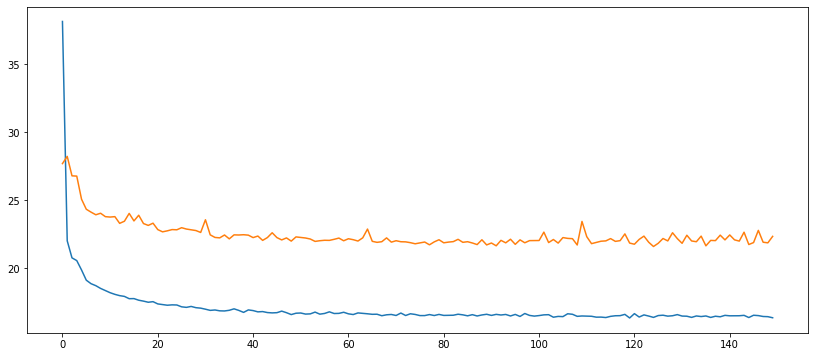

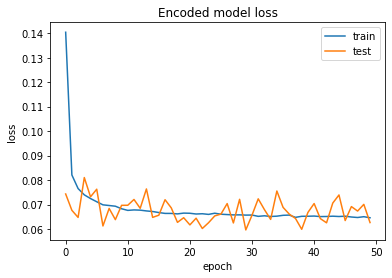

Overall accuracy of Convolutional Neural Network model: 0.9748599036530385


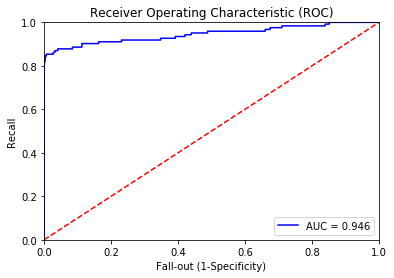

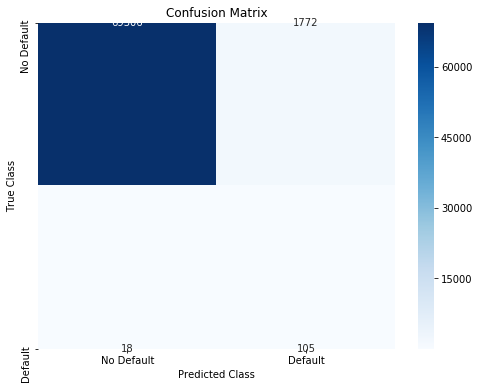

AUC(ROC): 0.914364089193665
Precision: 0.05594033031433138
Recall: 0.8536585365853658
F1 score: 0.105
False positives: 1772
True positives: 105
False negatives: 18
True negatives: 69306


In [6]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 15 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(4, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = BorderlineSMOTE(random_state=2)
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    

    input_dim = X_res_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(X_res_train, X_res_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(X_res_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train_res, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [7]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = {:0.2f}%".format(Average_precision*100))

print("Average Recall = {:0.2f}%".format(Average_recall*100))

print("Average F1 score = {:0.2f}%".format(Average_f1_score*100))

Average tn = 69621.0
Average fp = 1457.75
Average fn = 15.5
Average tp = 107.5
Average Precision = 6.87%
Average Recall = 87.40%
Average F1 score = 12.74%


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 278484
Total fp: 5831
 Total fn:62
 Total tp:430
Total Precision = 0.0686791247404568
Total Recall = 0.8739837398373984
Total F1_score = 0.1273508070487191
